Generation 1: Best Fitness = 14.954193
Generation 2: Best Fitness = 13.621616
Generation 3: Best Fitness = 13.621616
Generation 4: Best Fitness = 13.235038
Generation 5: Best Fitness = 12.712197
Generation 6: Best Fitness = 12.439850
Generation 7: Best Fitness = 11.432892
Generation 8: Best Fitness = 11.432892
Generation 9: Best Fitness = 11.294590
Generation 10: Best Fitness = 10.775896
Generation 11: Best Fitness = 10.485623
Generation 12: Best Fitness = 10.080899
Generation 13: Best Fitness = 9.700434
Generation 14: Best Fitness = 9.070857
Generation 15: Best Fitness = 8.695320
Generation 16: Best Fitness = 7.651985
Generation 17: Best Fitness = 6.858268
Generation 18: Best Fitness = 6.459538
Generation 19: Best Fitness = 6.459538
Generation 20: Best Fitness = 6.206021
Generation 21: Best Fitness = 6.151522
Generation 22: Best Fitness = 5.503371
Generation 23: Best Fitness = 5.503371
Generation 24: Best Fitness = 4.643168
Generation 25: Best Fitness = 4.643168
Generation 26: Best Fi

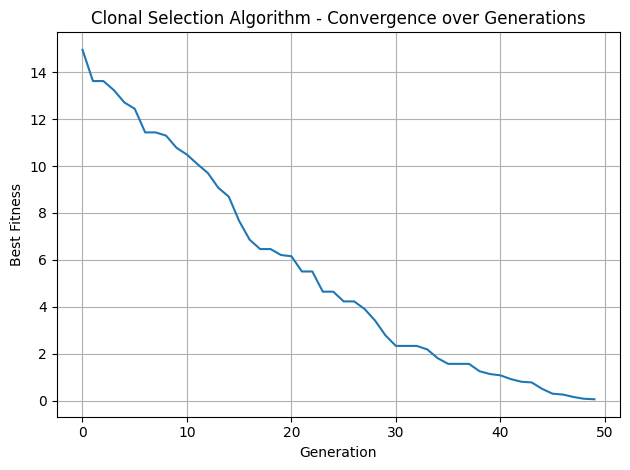

In [9]:
# Clonal Selection Algorithm implementation in Python
import numpy as np
import matplotlib.pyplot as plt

# Objective function (Sphere Function) to minimize
def objective_function(x):
    return np.sum(x**2)

# Initialize the population with random solutions
def initialize_population(pop_size, dim, lower_bound=-5, upper_bound=5):
    return np.random.uniform(lower_bound, upper_bound, (pop_size, dim))

# Evaluate fitness of all individuals in the population
def evaluate_population(population):
    return np.array([objective_function(ind) for ind in population])

# Select top N individuals based on fitness (lower is better)
def select_best_individuals(population, fitness, num_selected):
    indices = np.argsort(fitness)[:num_selected]
    return population[indices], fitness[indices]

# Clone and mutate the selected individuals
def clone_and_mutate(selected, fitness, clone_factor, mutation_rate):
    clones = []
    max_fit = max(fitness) + 1e-6  # Avoid division by zero
    for i, ind in enumerate(selected):
        # Number of clones is proportional to fitness (better solutions get more clones)
        num_clones = max(1, int(clone_factor * (1 - fitness[i] / max_fit)))
        for _ in range(num_clones):
            clone = ind.copy()
            mutation = mutation_rate * np.random.randn(*ind.shape)
            clone += mutation
            clones.append(clone)
    return np.array(clones)

# Main Clonal Selection Algorithm
def clonal_selection_algorithm(pop_size=20, dim=5, generations=50, 
                               selection_size=5, clone_factor=10, mutation_rate=0.1):
    population = initialize_population(pop_size, dim)
    best_fitness_history = []

    for gen in range(generations):
        fitness = evaluate_population(population)

        # Select the best individuals
        selected, selected_fitness = select_best_individuals(population, fitness, selection_size)

        # Clone and mutate selected individuals
        clones = clone_and_mutate(selected, selected_fitness, clone_factor, mutation_rate)

        # Merge current population with clones and select the next generation
        combined = np.vstack((population, clones))
        combined_fitness = evaluate_population(combined)
        population, _ = select_best_individuals(combined, combined_fitness, pop_size)

        # Store the best fitness value of this generation
        best_fitness = np.min(combined_fitness)
        best_fitness_history.append(best_fitness)

        print(f"Generation {gen + 1}: Best Fitness = {best_fitness:.6f}")

    # Final best solution
    best_solution = population[0]
    best_value = objective_function(best_solution)
    return best_solution, best_value, best_fitness_history

# Run the algorithm
best_solution, best_value, fitness_history = clonal_selection_algorithm()

# Display result
print("\nBest Solution Found:", best_solution)
print("Best Objective Value:", best_value)

# Plot the convergence curve
plt.plot(fitness_history)
plt.title("Clonal Selection Algorithm - Convergence over Generations")
plt.xlabel("Generation")
plt.ylabel("Best Fitness")
plt.grid(True)
plt.tight_layout()
plt.show()

The Clonal Selection Algorithm (CSA) is a bio-inspired algorithm derived from the clonal selection theory of the immune system. It's mainly used for optimization and pattern recognition problems. The core idea is to:

Generate a population of antibodies (solutions).

Evaluate their affinity (fitness).

Clone the best antibodies.

Mutate the clones (hypermutation).

Select the best antibodies to form the next generation.

The algorithm prints the best solution it found and its fitness (which should be close to 0).

The graph shows how quickly it converges.